# Face Recognition for Leo and Obama Images


First we detect Face, then train the model for face recognition between Leo and Obama and the then we test on a Image and see the results.

### Face Detection

In [1]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np
import os
%matplotlib inline
import cv2 #Import OpenCV

In [2]:
def face_detect(img):
    image = cv2.imread(img) #Input Image
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #Converting BGR(Default Input for CV2) to RGB(Original Image)

    face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml') #Cascade Classifier for Face Detection

    gray_scale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray_scale, 1.3, 5)
    print('Number of Faces:', len(faces))

    for(x,y,z,w) in faces:
        cv2.rectangle(image, (x, y), (x+z, y+w), (255, 0, 0), 2)

    plt.imshow(image)
    plt.show()

Number of Faces: 1


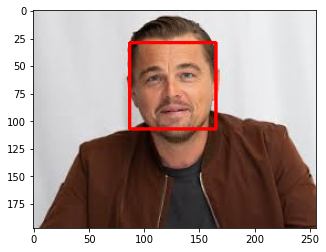

Number of Faces: 1


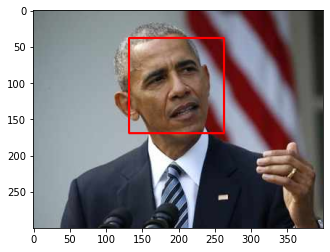

In [3]:
face_detect("C:\\Users\\P. R. RAJAGOPAL\\Desktop\\Data Science\\ML Models\\Images\\0\\leo8.jpg")
face_detect("C:\\Users\\P. R. RAJAGOPAL\\Desktop\\Data Science\\ML Models\\Images\\1\\Obama10.jpg")

# Face Recognition

In [4]:
# Function for Face Detection
def face_detect(img):
    '''
    Takes parameters: Image
    Returns: Gray Scaled Image and detected Faces
    Prints total number of faces found
    '''
    
    face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

    gray_scale = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray_scale, 1.3, 5)
    total_faces = len(faces)
    print("Number of Faces: ",total_faces)
    return faces, gray_scale

Number of Faces:  1


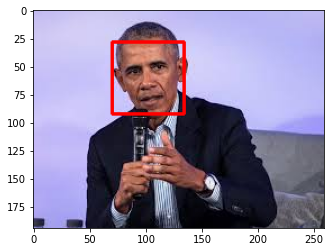

In [5]:
#Testing the above function with an example image
test_img=cv2.imread("C:\\Users\\P. R. RAJAGOPAL\\Desktop\\Data Science\\ML Models\\Images\\1\\Obama4.jpg")
test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
faces, gray_scale = face_detect(test_img)
for(x,y,w,h) in faces:
    cv2.rectangle(test_img, (x, y), (x+w, y+h), (255, 0, 0), 2)

plt.imshow(test_img)
plt.show()

In [6]:
# Giving labels for the Training Data
def labels_for_training_data(directory):
    '''
    Takes Parameters: the Directory which has the training Images
    Returns: Array of the faces found along with an array of the ids of the faces
    Prints the path of each image in training set and the id of the image
    '''
    faces=[]
    faceID=[]
    
    for path, subdirnames, filenames in os.walk(directory):
        for filename in filenames:
            if filename.startswith("."):
                print('Skipping system File')
                continue
            id1=os.path.basename(path)
            img_path=os.path.join(path, filename)
            print('img_path: ', img_path)
            print('Id: ',id1)
            test_img=cv2.imread(img_path)
            faces_rect, grey_img = face_detect(test_img)
            if len(faces_rect)==1:
                for x,y,w,h in faces_rect:
                    roi_grey = grey_img[y:y+w, x:x+h]
                    faces.append(roi_grey)
                    faceID.append(int(id1))
    return faces, faceID

In [7]:
#Training the Image Classifier
def train_classifier(faces, faceID):
    '''
    Parameters: Faces and Face ID from previous function
    Returns: The Trained Image Classifier
    '''
    face_recognizer = cv2.face.LBPHFaceRecognizer_create()
    faceID = np.array(faceID)
    face_recognizer.train(faces, faceID)
    return face_recognizer

#Drawing Rectangle
def draw_rectangle(test_img, face, thickness):
    '''
    Parameters: The Image which has the face and the face which requires a rectangle around it
    '''
    (x,y,w,h) = face
    cv2.rectangle(test_img, (x, y), (x+w, y+h), (0, 255, 255), thickness=thickness)

#Putting the Label
def put_text(test_img, text, x, y, fontScale, thickness):
    '''
    Parameters: the testing image, text/label to be put, the position of Label i.e. above the rectangle
    '''
    org = (x, y-20) 
    color = (0, 255, 255)
    font = cv2.FONT_HERSHEY_SIMPLEX 
    cv2.putText(test_img, text, org, font, fontScale, color, thickness, cv2.LINE_AA)
    

In [8]:
#Identifying Faces and Giving the Labels for the training set
faces, faceID = labels_for_training_data("C:\\Users\\P. R. RAJAGOPAL\\Desktop\\Data Science\\ML Models\\Images")

img_path:  C:\Users\P. R. RAJAGOPAL\Desktop\Data Science\ML Models\Images\0\leo.jpg
Id:  0
Number of Faces:  1
img_path:  C:\Users\P. R. RAJAGOPAL\Desktop\Data Science\ML Models\Images\0\leo2.jpg
Id:  0
Number of Faces:  1
img_path:  C:\Users\P. R. RAJAGOPAL\Desktop\Data Science\ML Models\Images\0\leo3.jpg
Id:  0
Number of Faces:  1
img_path:  C:\Users\P. R. RAJAGOPAL\Desktop\Data Science\ML Models\Images\0\leo4.jpg
Id:  0
Number of Faces:  1
img_path:  C:\Users\P. R. RAJAGOPAL\Desktop\Data Science\ML Models\Images\0\leo5.jpg
Id:  0
Number of Faces:  1
img_path:  C:\Users\P. R. RAJAGOPAL\Desktop\Data Science\ML Models\Images\0\leo6.jpg
Id:  0
Number of Faces:  1
img_path:  C:\Users\P. R. RAJAGOPAL\Desktop\Data Science\ML Models\Images\0\leo7.jpg
Id:  0
Number of Faces:  2
img_path:  C:\Users\P. R. RAJAGOPAL\Desktop\Data Science\ML Models\Images\0\leo8.jpg
Id:  0
Number of Faces:  1
img_path:  C:\Users\P. R. RAJAGOPAL\Desktop\Data Science\ML Models\Images\1\Obama.jpg
Id:  1
Number of Fa

In [9]:
# Training the Model on all the Images for train Images and Giving the label names
face_recognizer = train_classifier(faces, faceID)
name = {0:"Leonardo Dicaprio", 1:"Obama"}

# Testing

Number of Faces:  1
Confidence 53.657517478564635
Label: Obama


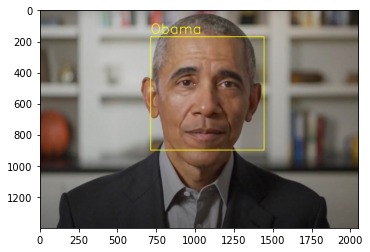

In [12]:
test_img=cv2.imread("Obama-test.jpg") #Load Test Image 
faces_detected, gray_img=face_detect(test_img)
for faces in faces_detected:
    (x,y,w,h) = faces
    roi_gray = gray_img[y:y+h, x:x+h]
    label, confidence = face_recognizer.predict(roi_gray)
    print('Confidence', confidence)
    print('Label:', name[label])
    draw_rectangle(test_img, faces, 3)
    predicted_name = name[label] 
    put_text(test_img, predicted_name, x, y, 3, 3)
    test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
    plt.imshow(test_img)
    plt.show()

Number of Faces:  1
Confidence 134.63587852776269
Label: Leonardo Dicaprio


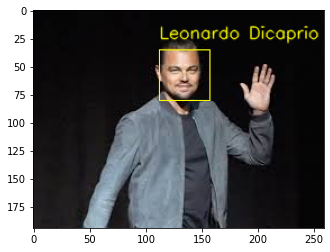

In [11]:
test_img=cv2.imread("Leo-test.jpg") #Load Test Image 
faces_detected, gray_img=face_detect(test_img)
for faces in faces_detected:
    (x,y,w,h) = faces
    roi_gray = gray_img[y:y+h, x:x+h]
    label, confidence = face_recognizer.predict(roi_gray)
    print('Confidence', confidence)
    print('Label:', name[label])
    draw_rectangle(test_img, faces, 1)
    predicted_name = name[label]
    put_text(test_img, predicted_name, x, y+10, 0.5, 1)
    test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
    plt.imshow(test_img)
    plt.show()